In [7]:
!ls ../benchmark/model/cat_ser/7/results

dev.csv


In [8]:
import pandas as pd

In [17]:
preds = pd.read_csv('../benchmark/model/cat_ser/7/results/dev.csv')
preds.head()

,Filename,Prediction
0,MSP-PODCAST_0002_0033.wav,"-0.4008, -0.3844, -0.3378, 0.3888, 0.3209, 0.4..."
1,MSP-PODCAST_0002_0039.wav,"-0.2203, -0.8214, 0.3939, -0.1879, 0.1063, 0.3..."
2,MSP-PODCAST_0002_0051.wav,"-1.4917, -0.4689, 1.1766, 0.2649, -0.2445, -0...."
3,MSP-PODCAST_0002_0061.wav,"-1.3414, -1.0133, 0.4365, 0.7330, 0.2257, 0.66..."
4,MSP-PODCAST_0006_0017.wav,"-2.2046, 1.1914, 0.4502, 0.3856, 0.5960, 0.000..."


In [12]:
preds['Prediction'].values[0].split(',')

['-0.4008',
 ' -0.3844',
 ' -0.3378',
 ' 0.3888',
 ' 0.3209',
 ' 0.4657',
 ' 0.6546',
 ' 1.2462']

In [15]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head()

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development
2,MSP-PODCAST_0002_0051.wav,N,4.0,4.2,4.2,127,Female,Development
3,MSP-PODCAST_0002_0059.wav,X,4.0,3.8,4.0,128,Female,Development
4,MSP-PODCAST_0002_0061.wav,F,3.4,2.8,4.2,128,Female,Development


In [18]:
preds['FileName'] = preds['Filename']
preds = preds.merge(df[['FileName','EmoClass']], how='left', on = 'FileName')

In [20]:
preds['EmoClass'].isnull().sum()

0

In [23]:
import numpy as np
preds['number_lists'] = preds['Prediction'].apply(lambda x: list(map(float, x.split(','))))

# Find the argmax for each list
preds['argmax'] = preds['number_lists'].apply(np.argmax)

In [24]:
preds.head()

,Filename,Prediction,FileName,EmoClass,number_lists,argmax
0,MSP-PODCAST_0002_0033.wav,"-0.4008, -0.3844, -0.3378, 0.3888, 0.3209, 0.4...",MSP-PODCAST_0002_0033.wav,N,"[-0.4008, -0.3844, -0.3378, 0.3888, 0.3209, 0....",7
1,MSP-PODCAST_0002_0039.wav,"-0.2203, -0.8214, 0.3939, -0.1879, 0.1063, 0.3...",MSP-PODCAST_0002_0039.wav,N,"[-0.2203, -0.8214, 0.3939, -0.1879, 0.1063, 0....",7
2,MSP-PODCAST_0002_0051.wav,"-1.4917, -0.4689, 1.1766, 0.2649, -0.2445, -0....",MSP-PODCAST_0002_0051.wav,N,"[-1.4917, -0.4689, 1.1766, 0.2649, -0.2445, -0...",7
3,MSP-PODCAST_0002_0061.wav,"-1.3414, -1.0133, 0.4365, 0.7330, 0.2257, 0.66...",MSP-PODCAST_0002_0061.wav,F,"[-1.3414, -1.0133, 0.4365, 0.733, 0.2257, 0.66...",6
4,MSP-PODCAST_0006_0017.wav,"-2.2046, 1.1914, 0.4502, 0.3856, 0.5960, 0.000...",MSP-PODCAST_0006_0017.wav,N,"[-2.2046, 1.1914, 0.4502, 0.3856, 0.596, 0.000...",1


In [25]:
classes = ['A', 'S', 'H', 'U', 'F', 'D', 'C', 'N']

map_argmax = dict()
for i, c in enumerate(classes):
    map_argmax[i] = c

preds['PRED'] = preds['argmax'].map(map_argmax)

In [26]:
preds.head()

,Filename,Prediction,FileName,EmoClass,number_lists,argmax,PRED
0,MSP-PODCAST_0002_0033.wav,"-0.4008, -0.3844, -0.3378, 0.3888, 0.3209, 0.4...",MSP-PODCAST_0002_0033.wav,N,"[-0.4008, -0.3844, -0.3378, 0.3888, 0.3209, 0....",7,N
1,MSP-PODCAST_0002_0039.wav,"-0.2203, -0.8214, 0.3939, -0.1879, 0.1063, 0.3...",MSP-PODCAST_0002_0039.wav,N,"[-0.2203, -0.8214, 0.3939, -0.1879, 0.1063, 0....",7,N
2,MSP-PODCAST_0002_0051.wav,"-1.4917, -0.4689, 1.1766, 0.2649, -0.2445, -0....",MSP-PODCAST_0002_0051.wav,N,"[-1.4917, -0.4689, 1.1766, 0.2649, -0.2445, -0...",7,N
3,MSP-PODCAST_0002_0061.wav,"-1.3414, -1.0133, 0.4365, 0.7330, 0.2257, 0.66...",MSP-PODCAST_0002_0061.wav,F,"[-1.3414, -1.0133, 0.4365, 0.733, 0.2257, 0.66...",6,C
4,MSP-PODCAST_0006_0017.wav,"-2.2046, 1.1914, 0.4502, 0.3856, 0.5960, 0.000...",MSP-PODCAST_0006_0017.wav,N,"[-2.2046, 1.1914, 0.4502, 0.3856, 0.596, 0.000...",1,S


In [28]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 67.0 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 78.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 33.5 MB/s eta 0:00:00


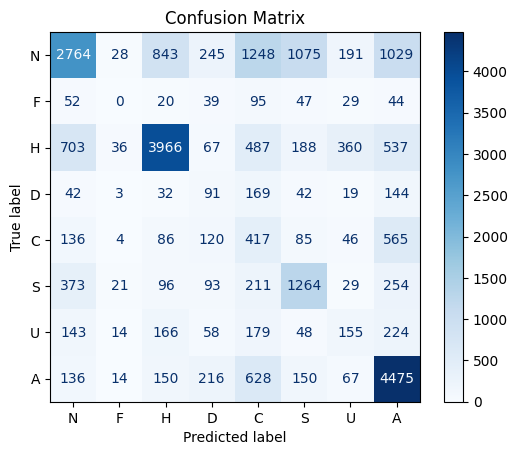

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(preds['EmoClass'], preds['PRED'], labels=preds['EmoClass'].unique())

# Display labels
labels = preds['EmoClass'].unique()

# Visualize confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [34]:
f1_score(preds['EmoClass'], preds['PRED'], average='macro')

0.34642493901379534

In [37]:
f1_score(preds['EmoClass'], preds['PRED'], average='micro')

0.5199144825401852

In [36]:
accuracy_score(preds['EmoClass'], preds['PRED'])

0.5199144825401852

In [38]:
preds['PRED_dumb'] = 'N'
f1_score(preds['EmoClass'], preds['PRED_dumb'], average='macro'), accuracy_score(preds['EmoClass'], preds['PRED_dumb'])

(0.05678375814693552, 0.2938870852799113)

In [39]:
preds['EmoClass'].value_counts()

EmoClass
N    7423
H    6344
A    5836
S    2341
C    1459
U     987
D     542
F     326
Name: count, dtype: int64

# Dimensional

In [42]:
!ls ../benchmark/model/dim_ser/7/results

dev.csv  test3.csv


In [43]:
preds = pd.read_csv('../benchmark/model/dim_ser/7/results/dev.csv')
preds.head()

,FileName,EmoAct,EmoVal,EmoDom
0,MSP-PODCAST_0002_0033.wav,4.110488,3.377474,4.107728
1,MSP-PODCAST_0002_0039.wav,4.309968,3.705411,4.469491
2,MSP-PODCAST_0002_0051.wav,3.757301,4.351225,4.176206
3,MSP-PODCAST_0002_0059.wav,4.127300,3.831695,4.195695
4,MSP-PODCAST_0002_0061.wav,4.053204,3.987261,4.183712


In [46]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head(2)

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development


In [47]:
preds = preds.merge(df[['FileName','EmoAct','EmoVal','EmoDom']], how='left', on = 'FileName')

In [49]:
preds.head(2)

,FileName,EmoAct_x,EmoVal_x,EmoDom_x,EmoAct_y,EmoVal_y,EmoDom_y
0,MSP-PODCAST_0002_0033.wav,4.110488,3.377474,4.107728,4.8,4.2,5.4
1,MSP-PODCAST_0002_0039.wav,4.309968,3.705411,4.469491,4.0,4.2,4.2


In [48]:
import torch
def CCC_loss(pred, lab, m_lab=None, v_lab=None, is_numpy=True):
    """
    pred: (N, 3)
    lab: (N, 3)
    """
    if is_numpy:
        pred = torch.Tensor(pred).float()
        lab = torch.Tensor(lab).float()
    
    m_pred = torch.mean(pred, 0, keepdim=True)
    m_lab = torch.mean(lab, 0, keepdim=True)

    d_pred = pred - m_pred
    d_lab = lab - m_lab

    v_pred = torch.var(pred, 0, unbiased=False)
    v_lab = torch.var(lab, 0, unbiased=False)

    corr = torch.sum(d_pred * d_lab, 0) / (torch.sqrt(torch.sum(d_pred ** 2, 0)) * torch.sqrt(torch.sum(d_lab ** 2, 0)))

    s_pred = torch.std(pred, 0, unbiased=False)
    s_lab = torch.std(lab, 0, unbiased=False)

    ccc = (2*corr*s_pred*s_lab) / (v_pred + v_lab + (m_pred[0]-m_lab[0])**2)    
    return ccc

In [54]:
CCC_loss(preds[['EmoAct_x','EmoVal_x','EmoDom_x']].values,preds[['EmoAct_y','EmoVal_y','EmoDom_y']].values)

tensor([0.6949, 0.7050, 0.6312])